# <center>Programming Exercise 1: Linear Regression</center>

## Introduction
Implementing linear regression to predict houses' prices in Python.

### Dataset

`ex1data1.txt` - Dataset for linear regression with one variable <br>
`ex1data2.txt` - Dataset for linear regression with multiple variables

## Imports and helper functions

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # for the surface plot
from matplotlib import use, cm # also for the surface plot

## Warm Up

In [59]:
identityMatrix = np.identity(5)
print(identityMatrix)

[[ 1.  0.  0.  0.  0.]
 [ 0.  1.  0.  0.  0.]
 [ 0.  0.  1.  0.  0.]
 [ 0.  0.  0.  1.  0.]
 [ 0.  0.  0.  0.  1.]]


## Linear regression with one variable
Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet. The chain already has trucks in various cities and you have data for profits and populations from the cities. You would like to use this data to help you select which city to expand to next.

The file ex1data1.txt contains the dataset for our linear regression problem. The first column is the population of a city and the second column is the profit of a food truck in that city. A negative value for profit indicates a loss.

### Plotting the Data
[Load data from txt](http://stackoverflow.com/questions/21546739/load-data-from-txt-with-pandas)

In [60]:
data = pd.read_csv('./data/ex1data1.txt', header=None)
data.columns = ["Population", "Profit"]
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


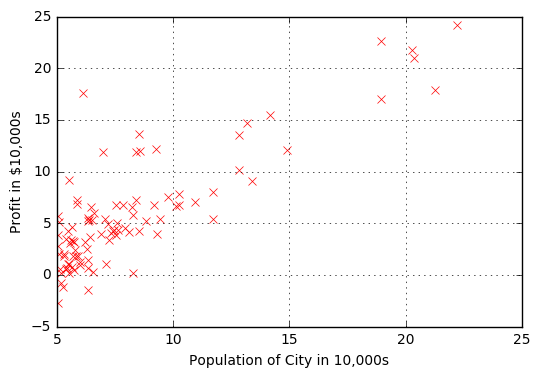

In [61]:
X = data.Population.to_frame() # data.Population is a Series, in order to insert we need to convert
X.insert(0, '', np.ones(len(X)))
y = data.Profit
m = len(data) # number of training examples

plt.plot(data.Population, data.Profit, 'rx')
plt.grid(True)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.show()

### Gradient Descent

#### Computing the Cost

In [62]:
def computeCost(X, y, theta):
    m = y.size
    h = X.dot(theta)
    return (1.0/(2*m)) * np.dot((h - y).T, (h - y))

print(round(computeCost(X, y, np.zeros(2)), 2)) # expected cost for initial thetas is 32.07

32.07


#### Gradient Descent

In [63]:
def gradientDescent(X, y, theta, alpha, num_iters):
    """
     Performs gradient descent to learn theta
       theta = gradientDescent(x, y, theta, alpha, num_iters) updates theta by
       taking num_iters gradient steps with learning rate alpha
    """
    
    m = y.size
    J_history = []
    
    for i in range(num_iters):
        differences = np.dot(X, theta) - y
        cost = computeCost(X, y, theta)
        J_history.append(cost)
        
        # To get the new theta, we need to firstly transpose X and take its dot product 
        # with the differents between prediction and actual of all elements. This gives 
        # us a vector of the sum of all differences multiply with all attributes.
        theta = theta - alpha*(1.0/m)*(np.dot(X.T, differences))
        
    return theta, J_history

In [64]:
iterations = 1500
alpha = 0.01
theta = np.zeros(2)
theta, J_history = gradientDescent(X, y, theta, alpha, iterations)

print('Theta found by gradient descent: {:.3f}\t{:.3f} \n'.format(theta[0], theta[1]))

Theta found by gradient descent: -3.630	1.166 



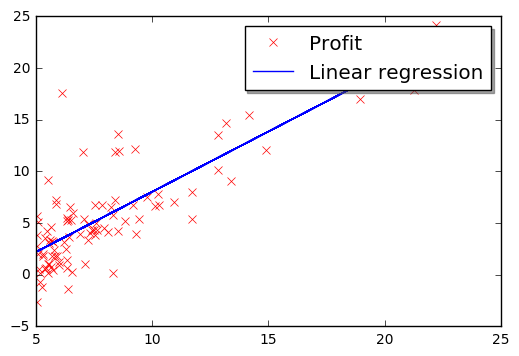

In [9]:
# Plot the linear fit
plt.plot(data.Population, data.Profit, 'rx')
plt.plot(data.Population, X.dot(theta), '-', label='Linear regression')
plt.legend(loc='upper right', shadow=True, fontsize='x-large', numpoints=1)
plt.show()

In [10]:
predict1 = np.array([1, 3.5]).dot(theta)
predict2 = np.array([1, 7]).dot(theta)
print('For population = 35,000, we predict a profit of {:.4f}'.format(predict1*10000))
print('For population = 70,000, we predict a profit of {:.4f}'.format(predict2*10000))

For population = 35,000, we predict a profit of 4519.7679
For population = 70,000, we predict a profit of 45342.4501


### Graphing

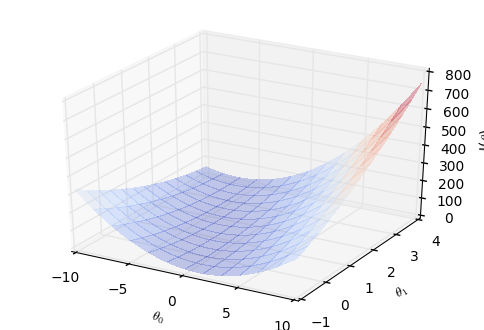

In [11]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, X.shape[0])
theta1_vals = np.linspace(-1, 4, X.shape[0])

# initialize J_vals to a matrix of 0's
J_vals = np.array(np.zeros(X.shape[0]).T)

for i in range(theta0_vals.size):
    col = []
    for j in range(theta1_vals.size):
        t = np.array([theta0_vals[i],theta1_vals[j]])
        col.append(computeCost(X, y, t.T))
    J_vals = np.column_stack((J_vals,col))
    
# Because of the way meshgrids work in the surf command, we need to
# transpose J_vals before calling surf, or else the axes will be flipped
J_vals = J_vals[:,1:].T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

# Surface plot
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=8, cstride=8, alpha=0.3,
                cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax.set_xlabel(r'$\theta_0$')
ax.set_ylabel(r'$\theta_1$')
ax.set_zlabel(r'J($\theta$)')
plt.show()

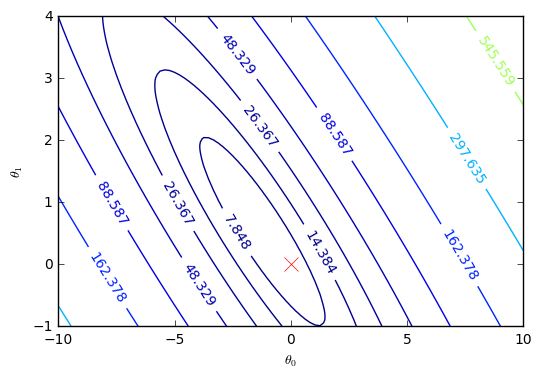

In [12]:
# Contour plot
plt.figure()

# Plot J_vals as 15 contours spaced logarithmically between 0.01 and 100
ax = plt.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
plt.clabel(ax, inline=1, fontsize=10)
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$')
plt.plot(0.0, 0.0, 'rx', linewidth=2, markersize=10)
plt.show()

## Linear Regression with Multiple Variables
Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

In [121]:
data = pd.read_csv('./data/ex1data2.txt', header=None)
data.columns = ["Size", "Bedrooms", "Price"]
data.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [122]:
m = data.shape[0]
X = pd.DataFrame({"Size": data.Size, "Bedrooms": data.Bedrooms})
X.insert(0, '', np.ones(m))
y = data.Price
X.head()

,,Bedrooms,Size
0,1.0,3,2104
1,1.0,3,1600
2,1.0,3,2400
3,1.0,2,1416
4,1.0,4,3000


### Feature Normalization

In [123]:
def featureNormalize(X):
    """
       returns a normalized version of X where
       the mean value of each feature is 0 and the standard deviation
       is 1. This is often a good preprocessing step to do when
       working with learning algorithms.
    """
    X_norm, mu, sigma = X.copy(), [1], [0]
    numOfFeatures = X.shape[1]
    
    for i in range(numOfFeatures):
        if i == 0:
            continue
        
        mu.append(X.iloc[:,i].mean())
        sigma.append(X.iloc[:,i].std())
        X_norm.iloc[:,i] = (X_norm.iloc[:,i] - mu[i]) / sigma[i]
    
    return X_norm, mu, sigma

X_norm, mu, sigma = featureNormalize(X)
X_norm.head()

,,Bedrooms,Size
0,1.0,-0.223675,0.130010
1,1.0,-0.223675,-0.504190
2,1.0,-0.223675,0.502476
3,1.0,-1.537767,-0.735723
4,1.0,1.090417,1.257476


In [124]:
print(mu)    # mean
print('Mean of "Bedrooms": \t{:.2f}'.format(X.iloc[:,1].mean()))
print('Mean of "Size": \t{:.2f}\n'.format(X.iloc[:,2].mean()))

print(sigma) # std
print('Std of "Bedrooms": \t{:.2f}'.format(X.iloc[:,1].std()))
print('Std of "Size": \t\t{:.2f}'.format(X.iloc[:,2].std()))

[1, 3.1702127659574466, 2000.6808510638298]
Mean of "Bedrooms": 	3.17
Mean of "Size": 	2000.68

[0, 0.76098188678009981, 794.70235353388966]
Std of "Bedrooms": 	0.76
Std of "Size": 		794.70


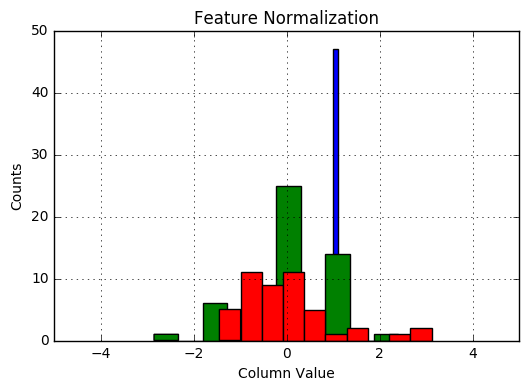

In [125]:
plt.grid(True)
plt.xlim([-5,5])
plt.hist(X_norm.iloc[:,0],label = 'col1')
plt.hist(X_norm.iloc[:,1],label = 'col2')
plt.hist(X_norm.iloc[:,2],label = 'col3')
plt.title('Feature Normalization')
plt.xlabel('Column Value')
plt.ylabel('Counts')
plt.show()

### Gradient Descent

In [126]:
# Vectorized form (review lab 1 assignment)
def computeCostMulti(X, y, theta):
    m = y.size
    h = np.dot(X, theta)
    return float(1.0/(2*m)) * np.dot((h - y).T, (h - y))

In [127]:
print(round(computeCostMulti(X_norm, y, np.zeros(3)), 2))

65591548106.5


In [128]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

In [131]:
theta, J_history = gradientDescent(X_norm, y, np.zeros(X_norm.shape[1]))

# None, Bedrooms, Size
print('Theta found by gradient descent: ', theta)

Theta found by gradient descent:              340412.563014
Bedrooms     -6558.990548
Size        110540.566546
dtype: float64


In [132]:
# Estimate the price of a 1650 sq-ft, 3 br house
price = np.array([1,3,1650]).dot(theta)

print('Predicted price of a 1650 sq-ft, 3 br house')
print('(using gradient descent): ', price)

Predicted price of a 1650 sq-ft, 3 br house
(using gradient descent):  182712670.393


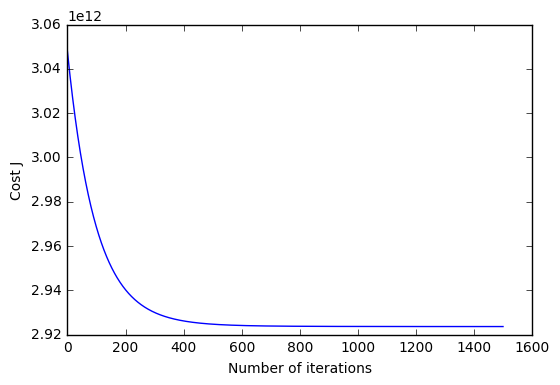

In [133]:
plt.plot(J_history, '-b')
plt.xlabel('Number of iterations')
plt.ylabel('Cost J')
plt.show()

In [134]:
# Plot the linear fit
sizeX = X.copy()
del sizeX['Bedrooms']

sizeTheta = np.delete(theta.copy(), 1)

plt.plot(data.Size, data.Price, 'rx')
plt.plot(data.Size, sizeX.dot(sizeTheta), '-', label='Linear regression')
plt.legend(loc='upper right', shadow=True, fontsize='x-large', numpoints=1)
plt.show()

ValueError: Wrong number of items passed 2, placement implies 3

### Normal Equation

In [93]:
from numpy.linalg import inv

def normalEqn(X,y):
    """ Computes the closed-form solution to linear regression
       normalEqn(X,y) computes the closed-form solution to linear
       regression using the normal equations.
    """
    return np.dot(np.dot(inv(np.dot(X.T,X)),X.T),y) # completely like the formular

print(normalEqn(X, y))

[ 89597.9095428   -8738.01911233    139.21067402]


In [95]:
# Estimate the price of a 1650 sq-ft, 3 br house
price = np.array([1,3,1650]).dot(normalEqn(X, y))

print('Predicted price of a 1650 sq-ft, 3 br house')
print('(using normal equation): ', round(price, 2))

Predicted price of a 1650 sq-ft, 3 br house
(using normal equation):  293081.46
